In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lego-dataset/lego_sets.csv
/kaggle/input/lego-dataset/parent_themes.csv
/kaggle/input/lego-dataset/themes.csv
/kaggle/input/lego-dataset/sets.csv


# Introduction:

Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.

It may not be widely known, but Lego has had its share of ups and downs since its inception in the early 20th century. This includes a particularly rough period in the late 90s. Lego was only able to survive due to a successful internal brand (Bionicle) and the introduction of its first licensed series: Star Wars.

Before diving into our analysis though, let's become familiar with the two datasets that will help you with this project:

# Questions

* What percentage of all licensed sets ever released were Star Wars themed?
* In wich year was Star Wars not the most popular licensed theme (in term of number of sets released that year)?
* How has the total number of Lego releases varied over the years? Which was the year with the most and least releases?
* What percentage of the total releases each year are licensed sets?

# Considerations

### lego_sets.csv
* set_num: A code that is unique to each set in the dataset. This column is critical, and a missing value indicates the set is a duplicate or invalid!
* set_name: A name for every set in the dataset (note that this can be the same for different sets).
* year: The date the set was released.
* num_parts: The number of parts contained in the set. This column is not central to our analyses, so missing values are acceptable.
* theme_name: The name of the sub-theme of the set.
* parent_theme: The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.

### parent_themes.csv
* id: A code that is unique to every theme.
* name: The name of the parent theme.
* is_licensed: A Boolean column specifying whether the theme is a licensed theme.

In [2]:
#Read the first dataframe

lego_sets_df = pd.read_csv('/kaggle/input/lego-dataset/lego_sets.csv')
lego_sets_df.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [3]:
#Read the second dataframe

theme_df = pd.read_csv('/kaggle/input/lego-dataset/parent_themes.csv')
theme_df.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


In [4]:
# Merge the two dataframes 

all_data = lego_sets_df.merge(theme_df, how='inner',left_on='parent_theme', right_on='name')
all_data.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,name_y,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,Legoland,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,Town,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,Castle,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,Space,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,Space,False


In [5]:
# Drop null values on 'set_num' as it was indicated in considerations

all_data = all_data.dropna(subset='set_num')

In [6]:
# Drop 'name_y' column because it's a duplicate
all_data.drop(columns='name_y', inplace=True)
all_data.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False


In [7]:
# Change 'name_x' column to 'name'

all_data.rename(columns={'name_x': 'name'}, inplace=True) 
all_data.head()

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False


In [8]:
# Filtering licensed sets

licensed = all_data[all_data['is_licensed']]
licensed.head()

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed
44,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
45,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
54,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
57,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
95,10075-1,Spider-Man Action Pack,2002,25.0,Spider-Man,Super Heroes,482,True


In [9]:
# Filtering Star Wars

star_wars = licensed[licensed['parent_theme'] == 'Star Wars']
star_wars.head()

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed
44,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
45,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
54,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
57,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
116,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


# 1 - What percentage of all licensed sets ever released were Star Wars themed?

In [10]:
percentaje_star_wars = round((star_wars.shape[0] / licensed.shape[0] * 100),2)
percentaje_star_wars

51.65

### Star Wars represent 51,65% of the total releases 

In [11]:
# Creae a new column 'count' 

licensed.loc[:, 'count'] = 1

/tmp/ipykernel_18/2086507292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  licensed.loc[:, 'count'] = 1


In [12]:
# Sort the data by 'year'

licensed_sorted = licensed.sort_values('year')
licensed_sorted.head()

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed,count
7837,7141-1,Naboo Fighter,1999,179.0,Star Wars Episode 1,Star Wars,158,True,1
7845,7150-1,TIE Fighter & Y-wing,1999,NaN,Star Wars Episode 4/5/6,Star Wars,158,True,1
7847,7151-1,Sith Infiltrator,1999,244.0,Star Wars Episode 1,Star Wars,158,True,1
7815,7131-1,Anakin's Podracer,1999,136.0,Star Wars Episode 1,Star Wars,158,True,1
7856,7161-1,Gungan Sub,1999,379.0,Star Wars Episode 1,Star Wars,158,True,1


In [13]:
# Group by 'year' and 'parent_theme' to calculate the sum of sets released 

sumed_df = licensed_sorted.groupby(['year', 'parent_theme']).sum().reset_index()
sumed_df.head()

,year,parent_theme,set_num,name,num_parts,theme_name,id,is_licensed,count
0,1999,Star Wars,7141-17150-17151-17131-17161-17130-17171-17128...,Naboo FighterTIE Fighter & Y-wingSith Infiltra...,1384.0,Star Wars Episode 1Star Wars Episode 4/5/6Star...,2054,13,13
1,2000,Disney's Mickey Mouse,4178-14167-14166-14165-14164-1,Mickey's Fishing AdventureMickey's MansionMick...,405.0,Disney's Mickey MouseDisney's Mickey MouseDisn...,1940,5,5
2,2000,Star Wars,7134-13341-1VP-87104-14151270-13343-13342-1712...,A-wing FighterStar Wars #2 - Luke/Han/Boba Min...,2580.0,Star Wars Episode 4/5/6Star Wars Episode 4/5/6...,4108,26,26
3,2001,Harry Potter,4702-14701-14704-14705-14722-14707-14708-14709...,The Final ChallengeSorting HatThe Chamber of t...,1284.0,Sorcerer's StoneSorcerer's StoneSorcerer's Sto...,2706,11,11
4,2001,Star Wars,7146-18008-1VP-28007-165028-165030-165034-1710...,TIE FighterStormtrooper™Star Wars Co-Pack of 7...,2949.0,Star Wars Episode 4/5/6Star WarsStar Wars Epis...,2212,14,14


In [14]:
# Sort descending by 'count'

sumed_df.sort_values('count', ascending=False, inplace=True)
sumed_df = sumed_df.drop_duplicates(['year'])
sumed_df.head()

,year,parent_theme,set_num,name,num_parts,theme_name,id,is_licensed,count
82,2017,Super Heroes,5004930-15004929-1211701-141234-141233-170900-...,Accessory packBatman Battle PodBatmanBumblebee...,13123.0,BatmanBatmanBatmanSuper HeroesSuper HeroesBatm...,34704,72,72
76,2016,Star Wars,75130-175131-175129-175126-175114-175115-17511...,AT-DPResistance Trooper Battle PackWookiee Gun...,6934.0,Star Wars RebelsStar Wars Episode 7Star Wars R...,9638,61,61
67,2015,Star Wars,SDCC2015-2SW911506-1SW911508-1SW911509-1SW9115...,Dagobah Mini-BuildSnowspeederMini Slave 1Imper...,11410.0,Star WarsStar Wars Episode 4/5/6MiniStar Wars ...,9164,58,58
59,2014,Star Wars,TRUXWINGTIE-130244-130246-130247-1TRUTIE-1TRUG...,"TRU X-Wing Fighter & TIE Fighter (May 3, 2014)...",8293.0,Star Wars OtherMiniStar WarsStar WarsStar Wars...,7110,45,45
47,2012,Star Wars,celebvi-110227-166431-166432-19679-19678-19677...,Boba Fett’s Slave I - Mini - Star Wars Celebra...,6769.0,Star Wars Episode 4/5/6Star Wars Episode 4/5/6...,6794,43,43


In [15]:
#As we can see every year from 1999 to 2016 the most releases were for Star Wars until 2017 when Super Heroes surpassed Star Wars.

sorted_sumed_df = sumed_df.sort_values(['year']).reset_index()
sorted_sumed_df

,index,year,parent_theme,set_num,name,num_parts,theme_name,id,is_licensed,count
0,0,1999,Star Wars,7141-17150-17151-17131-17161-17130-17171-17128...,Naboo FighterTIE Fighter & Y-wingSith Infiltra...,1384.0,Star Wars Episode 1Star Wars Episode 4/5/6Star...,2054,13,13
1,2,2000,Star Wars,7134-13341-1VP-87104-14151270-13343-13342-1712...,A-wing FighterStar Wars #2 - Luke/Han/Boba Min...,2580.0,Star Wars Episode 4/5/6Star Wars Episode 4/5/6...,4108,26,26
2,4,2001,Star Wars,7146-18008-1VP-28007-165028-165030-165034-1710...,TIE FighterStormtrooper™Star Wars Co-Pack of 7...,2949.0,Star Wars Episode 4/5/6Star WarsStar Wars Epis...,2212,14,14
3,6,2002,Star Wars,4195641-1K7153-1K7204-1K720x-18009-18010-18011...,Star Wars Co-Pack of 7142 and 7152Episode II U...,4735.0,Star Wars Episode 4/5/6Star Wars Episode 2Star...,4424,28,28
4,9,2003,Star Wars,4481-14480-14479-14478-14476-14475-14207901-14...,Hailfire DroidJabba's PalaceTIE BomberGeonosia...,6660.0,Star WarsStar Wars Episode 4/5/6Star Wars Epis...,5056,32,32
5,12,2004,Star Wars,4501-2K10131-14502-24500-210134-14483-24495-14...,"Mos Eisley Cantina, Original Trilogy Edition b...",1659.0,Star Wars Episode 4/5/6Star Wars Episode 4/5/6...,3160,20,20
6,16,2005,Star Wars,K7283-16966-165771-16966-26965-265845-165844-1...,V-wing Space Battle CollectionJedi Starfighter...,4730.0,Star Wars Episode 3MiniStar Wars Episode 3Mini...,4424,28,28
7,20,2006,Star Wars,7261-210175-110174-16205-16206-16207-16208-162...,Clone Turbo Tank (with Non-Light-Up Mace Windu...,2769.0,Star Wars Episode 3Star Wars Episode 4/5/6Star...,1738,11,11
8,24,2007,Star Wars,66221-17664-110179-110178-17665-17662-17654-17...,X-wing Fighter and Luke Pilot Maquette Co-Pack...,11361.0,Star Wars Episode 4/5/6Star Wars OtherStar War...,2528,16,16
9,28,2008,Star Wars,20006-110186-18031-18029-18028-17668-17667-110...,Clone Turbo Tank - MiniGeneral GrievousV-19 To...,6865.0,Star Wars Episode 3Star Wars Episode 3Star War...,3634,23,23


# 2 - In wich year was Star Wars not the most popular licensed theme (in term of number of sets released that year)?

### In 2017, Super Heroes surpassed Star Wars as the most popular released theme with 72 releases.

In [16]:
# Group, count releases by year and sort them.

lego_sets_df['count'] = 1
result = lego_sets_df.groupby(['year'])['count'].sum().reset_index()
result_sorted = result.sort_values(['count'], ascending=False)

# 3 - How has the total number of Lego releases varied over the years? Which was the year with the most and least releases?
### 2014 was the year with the highest number of releases with 732 and 1960 was the year with the lowest with only 3.

In [17]:
result_sorted.head(1)

,year,count
62,2014,732


In [18]:
result_sorted.tail(1)

,year,count
8,1960,3


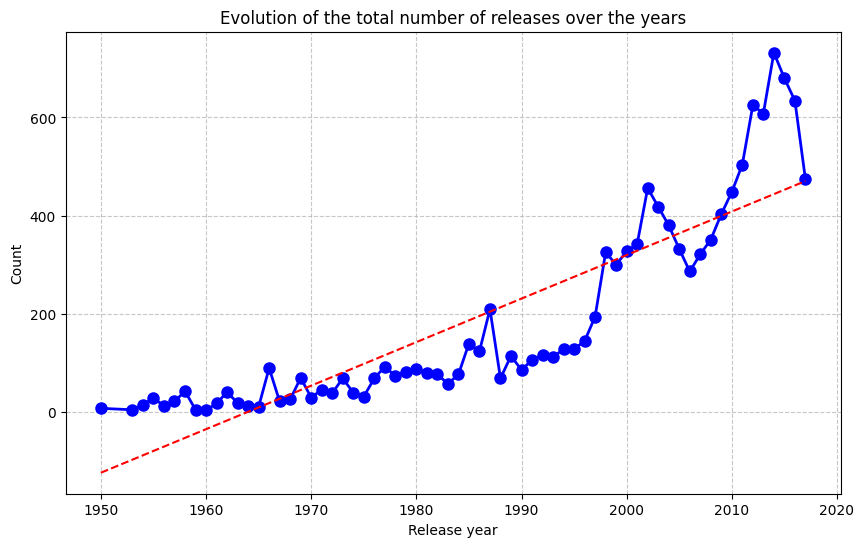

In [19]:
# Line graph of showing the evolution of the total number of releases by year

#Import libraries

import matplotlib.pyplot as plt
import numpy as np


#Line graph

plt.figure(figsize=(10, 6))
plt.plot(result['year'], result['count'], marker='o', linestyle='-', color='b', markersize=8, linewidth=2)

plt.title('Evolution of the total number of releases over the years')
plt.xlabel('Release year')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)

# Trend line

z = np.polyfit(result['year'], result['count'], 1)
p = np.poly1d(z)
plt.plot(result['year'], p(result['year']), color='r', linestyle='--', label='Trendline')

plt.show()

# What percentage of the total releases each year are licensed sets?

In [20]:
# Filtering the data since 1999 

df =all_data[all_data['year'] >= 1999]
df.sort_values(['year', 'parent_theme'], ascending=True)
df.head()

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed
18,03093-1,The Race to Build It Board Game,1999,NaN,Game,Gear,501,False
25,10000-1,Guarded Inn,2001,256.0,Castle,Castle,186,False
26,10001-1,Metroliner,2001,NaN,Train,Train,233,False
27,10002-1,Railroad Club Car,2001,272.0,Train,Train,233,False
28,10003-1,1 x 2 Sand Red Bricks,2001,100.0,Bulk Bricks,Bulk Bricks,254,False


In [21]:
# Grouping the data by 'year' and 'is_licensed' also calculates the percentage of licensed products

grouped_data = df.groupby(['year', 'is_licensed']).size().unstack(fill_value=0)
grouped_data.columns = ['Not Licensed', 'Licensed']
grouped_data['PercentageWithLicense'] = round((grouped_data['Licensed'] / (grouped_data['Licensed'] + grouped_data['Not Licensed'])) * 100,2)
grouped_data

,Not Licensed,Licensed,PercentageWithLicense
year,,,
1999,287,13,4.33
2000,296,31,9.48
2001,314,25,7.37
2002,397,50,11.19
2003,375,40,9.64
2004,331,40,10.78
2005,295,35,10.61
2006,259,24,8.48
2007,298,21,6.58


<Figure size 1000x600 with 0 Axes>

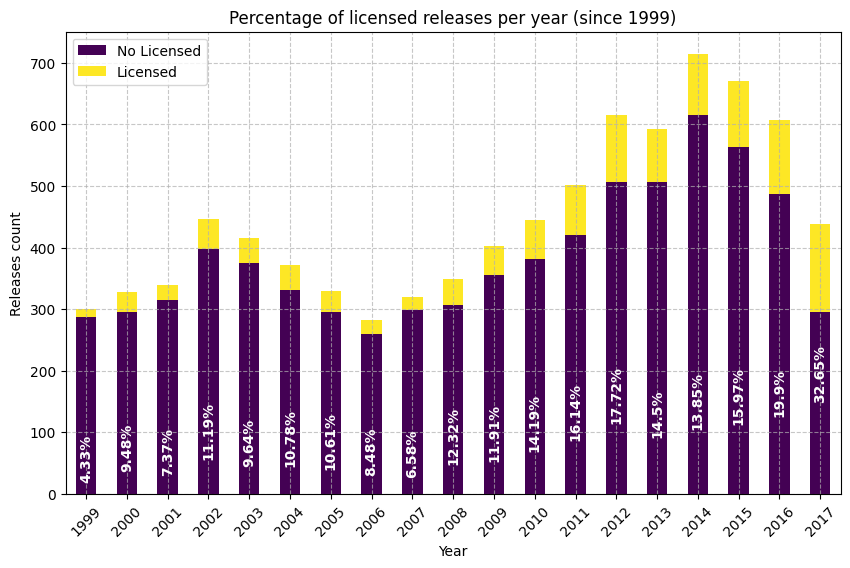

In [22]:
# Plot the results on a stacked bar chart

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, y=['Not Licensed', 'Licensed'], colormap='viridis', figsize=(10, 6))
plt.title('Percentage of licensed releases per year (since 1999)')
plt.xlabel('Year')
plt.ylabel('Releases count')
plt.legend(['No Licensed', 'Licensed'], loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

for i, (value, perc) in enumerate(zip(grouped_data['Licensed'], grouped_data['PercentageWithLicense'])):
    plt.text(i, value + 5, f'{perc}%', ha='center', va='bottom', color='white', fontweight='bold', rotation=90)


plt.show()

### As we can see, the percentage of licensed sets has a slight increasing trend since they were first introduced in 1999.